In [ ]:
#Linear Regression ML Project for House Price Prediction 


In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#import dataset
df=pd.read_csv('House_price.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

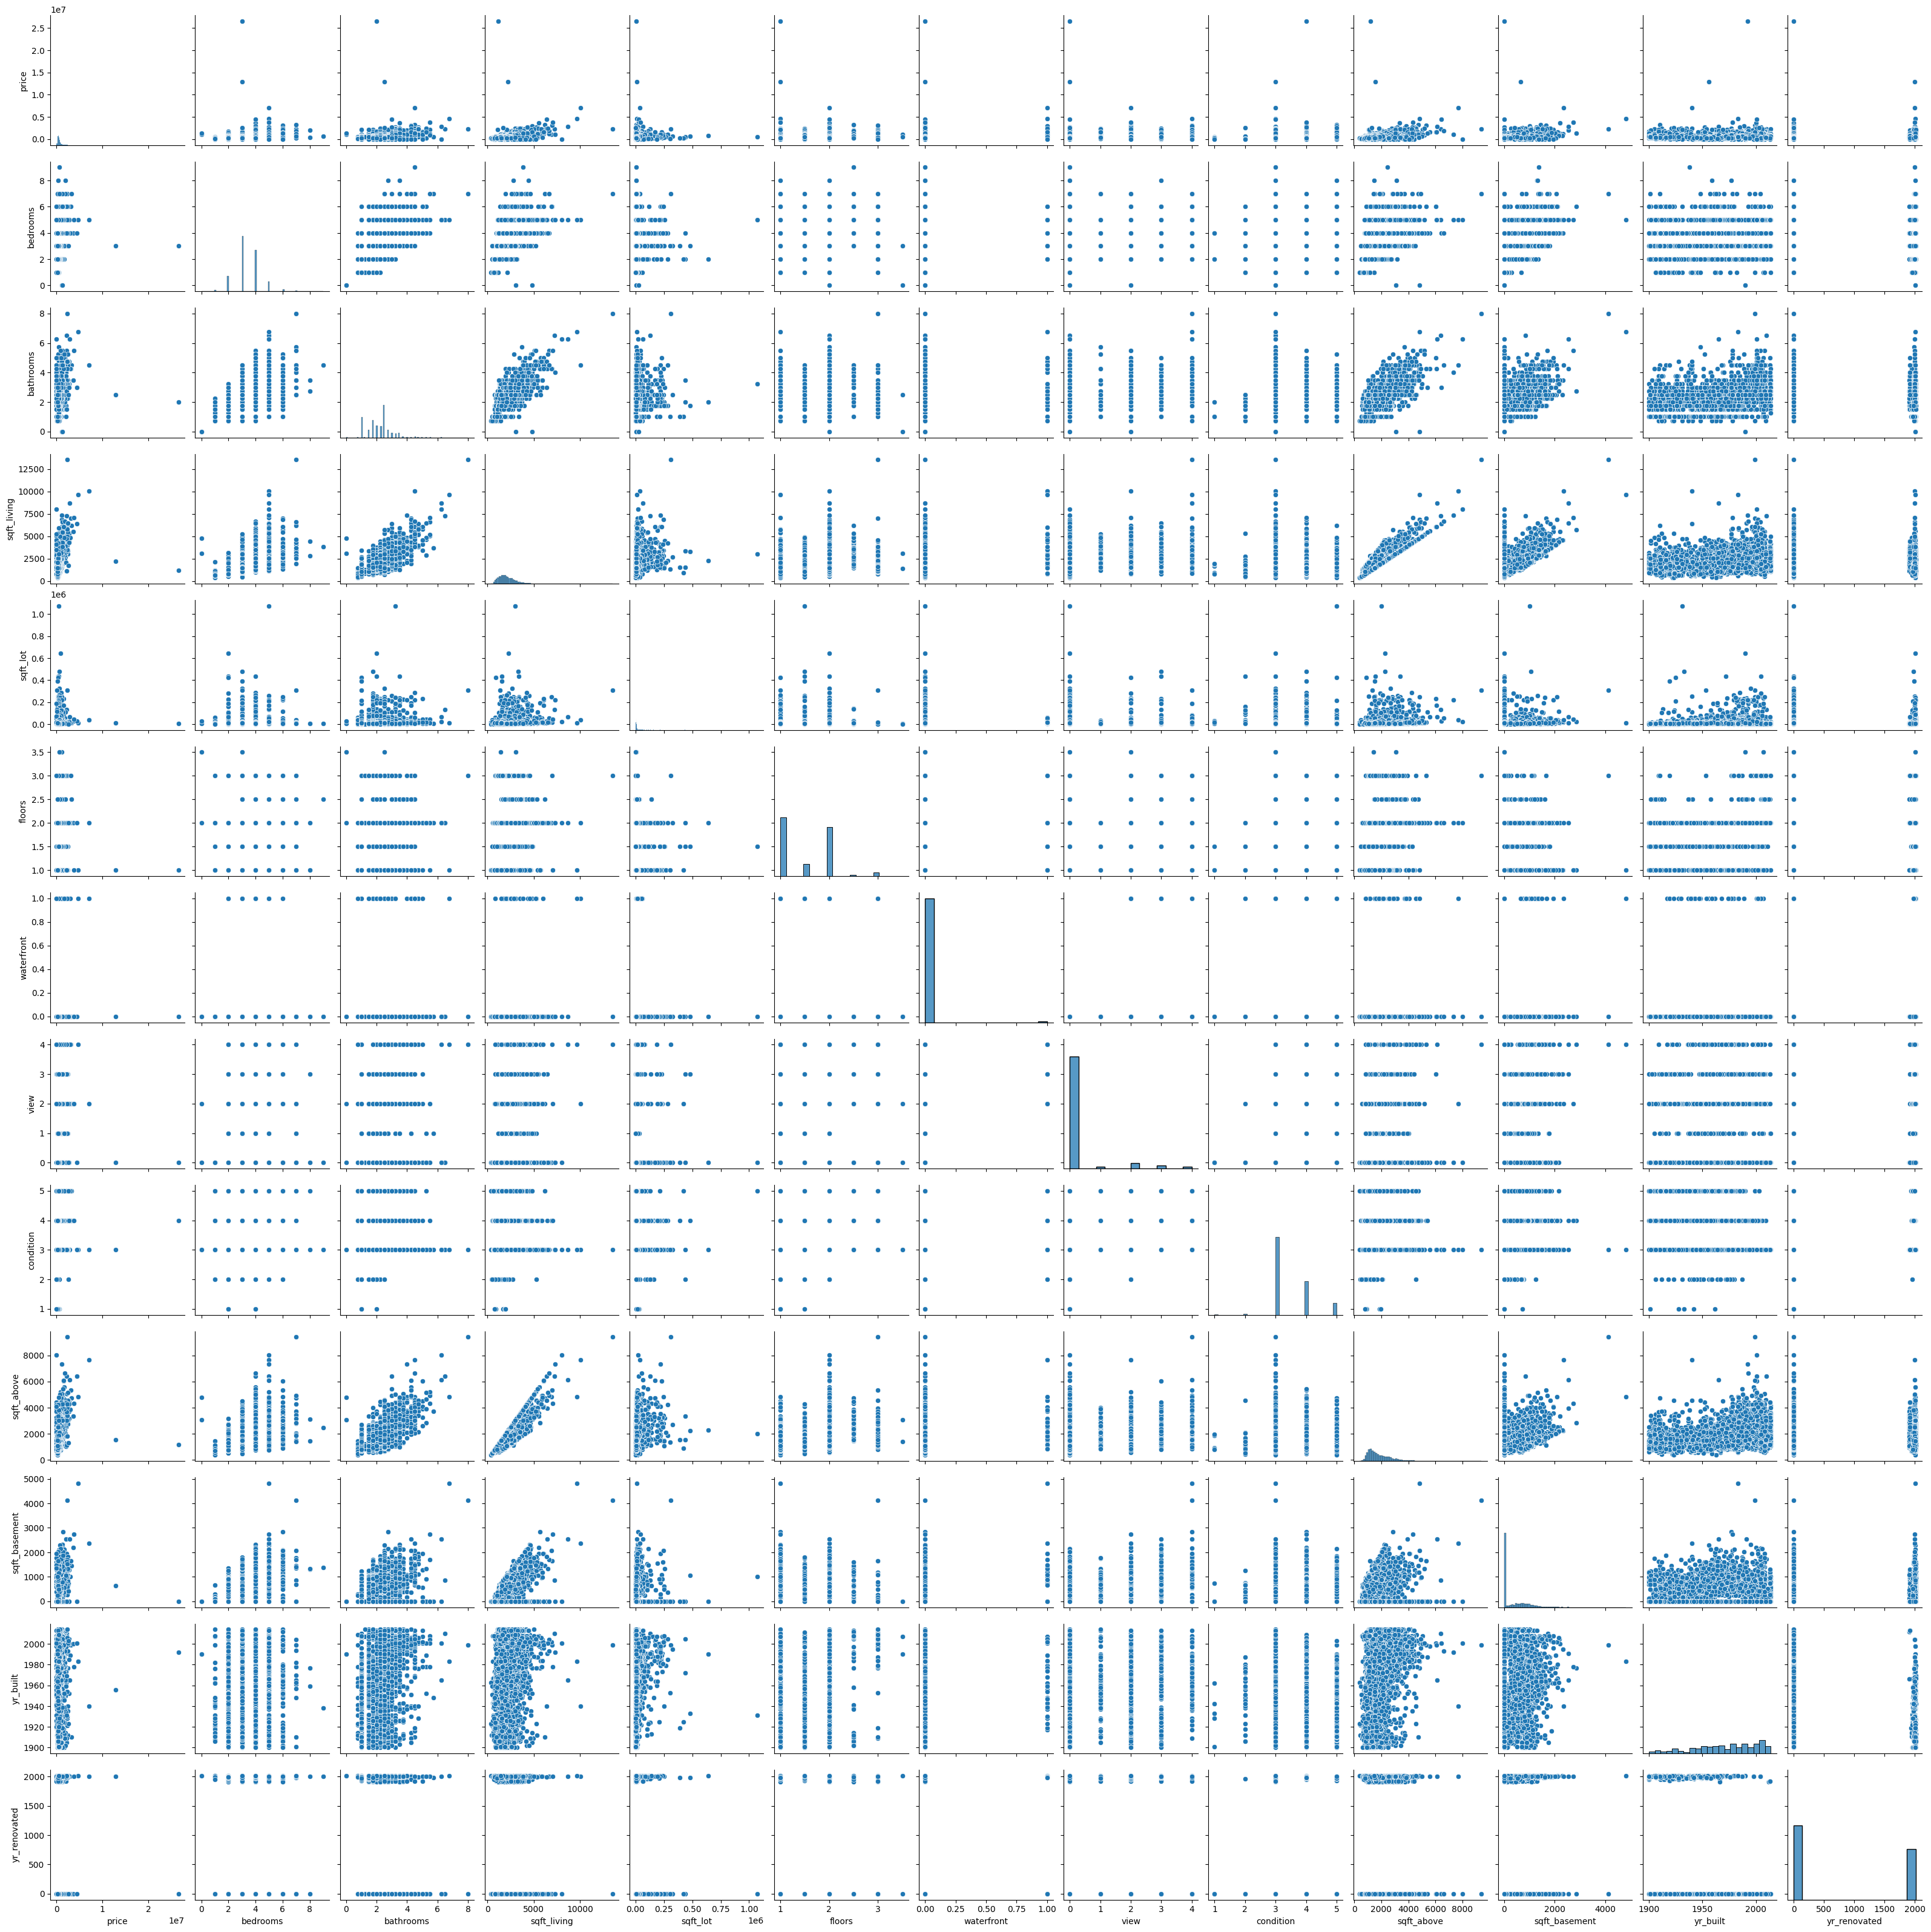

In [7]:
#Data Analysis for House Price Prediction
sns.pairplot(df)

C:\Users\Win-10\AppData\Local\Temp\ipykernel_13884\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

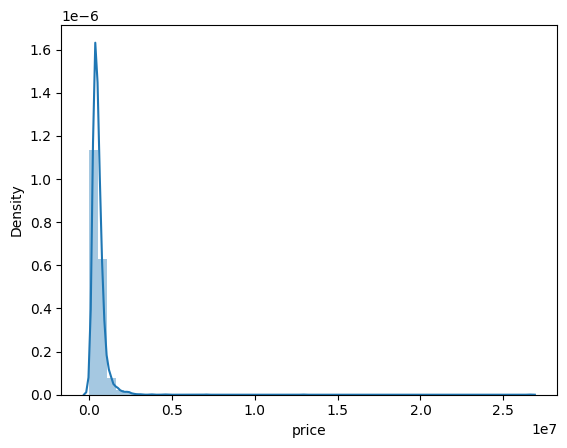

In [9]:
sns.distplot(df['price'])

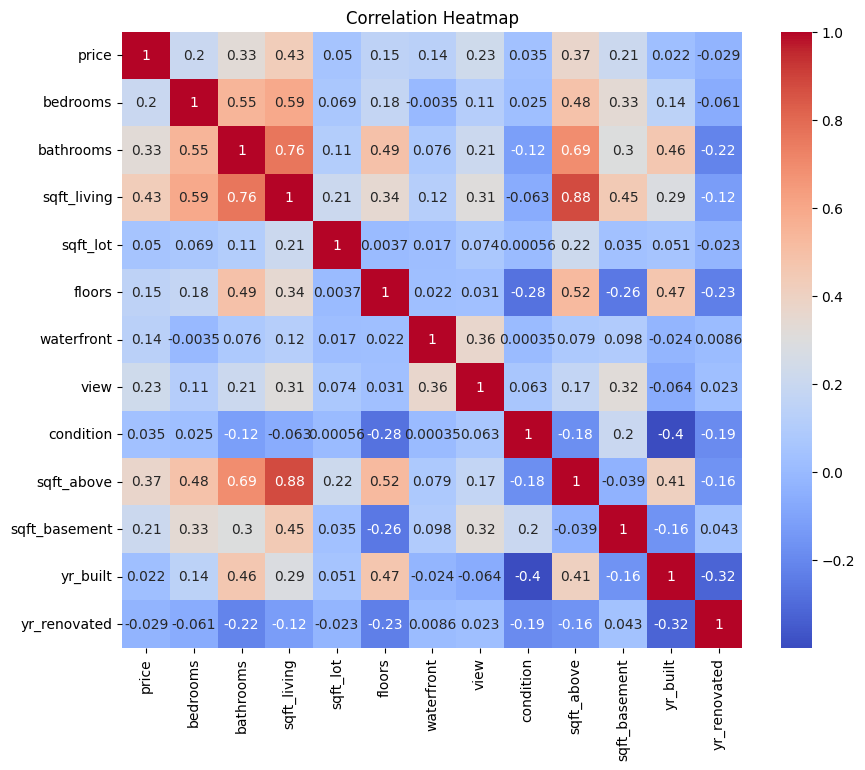

In [14]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric = df_numeric.dropna()
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#Training a Linear Regression Model  X and y List
X=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
Y=df[['yr_renovated', 'yr_built', 'sqft_basement', 'sqft_above', 'condition', 'view', 'waterfront', 'floors', 'sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'price']]


In [20]:
#Data Splliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [21]:
# creting regression model
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [23]:
print(lm.intercept_)

[-1.54614099e-11 -2.04636308e-12  1.25055521e-12 -1.11413101e-11
  8.88178420e-16 -2.78665979e-14 -2.31759056e-15  1.59205982e-13
  7.45785655e-11 -1.00044417e-11 -2.77156076e-12  5.10702591e-13
  4.65661287e-10]


In [35]:
print(lm.coef_.shape)


(13, 13)


In [38]:
# Create a DataFrame for the coefficients
coeff_df = pd.DataFrame(lm.coef_, index=X.columns, columns=[f'Target_{i+1}' for i in range(lm.coef_.shape[1])])
coeff_df



,Target_1,Target_2,Target_3,Target_4,Target_5,Target_6,Target_7,Target_8,Target_9,Target_10,Target_11,Target_12,Target_13
price,-5.837712e-20,-3.969915e-14,3.182299e-13,-2.563054e-16,5.898060e-17,1.174194e-13,-2.044639e-13,-5.833336e-14,2.786841e-13,-5.594483e-17,-2.676895e-16,6.679145e-15,1.000000e+00
bedrooms,-2.349030e-18,1.176143e-15,-2.983694e-14,2.494722e-15,-1.788934e-18,7.806372e-15,1.100793e-14,-7.521080e-15,-3.567839e-15,-2.783940e-15,4.053713e-15,1.000000e+00,-2.831843e-16
bathrooms,-2.234356e-19,1.227352e-13,5.364657e-13,3.333333e-01,5.551115e-17,-2.009961e-14,-1.727293e-13,3.012083e-14,3.606849e-14,-3.333333e-01,6.666667e-01,-1.111809e-15,-1.778092e-16
sqft_living,-4.491335e-18,2.760792e-12,4.152579e-13,3.333333e-01,8.326673e-17,3.195103e-14,4.295017e-14,-2.512527e-14,-2.685029e-14,6.666667e-01,-3.333333e-01,5.620030e-16,4.770490e-18
sqft_lot,2.345744e-20,7.024936e-16,2.060402e-16,-2.879086e-14,6.776264e-21,1.119529e-15,4.667624e-16,4.781233e-17,1.000000e+00,2.879334e-14,2.872422e-14,-4.615093e-18,2.934704e-18
floors,2.516236e-21,1.639896e-15,1.223831e-15,-1.560205e-14,1.084202e-19,-3.759601e-16,2.431545e-15,1.000000e+00,2.626226e-16,1.560152e-14,1.559211e-14,1.036786e-17,4.645976e-19
waterfront,-2.178236e-23,5.202188e-16,-2.637033e-18,2.459194e-14,8.470329e-21,6.130739e-17,1.000000e+00,1.335693e-16,-1.332225e-16,-2.459231e-14,-2.459214e-14,7.894800e-19,-4.847940e-20
view,-1.730353e-20,3.168798e-15,-4.436655e-16,1.492824e-14,2.710505e-20,1.000000e+00,1.375178e-15,4.830877e-16,-2.617547e-15,-1.493314e-14,-1.487640e-14,-7.419974e-17,-8.351851e-18
condition,-2.688583e-18,1.147038e-11,5.319537e-12,-1.063039e-14,1.000000e+00,2.998404e-12,9.932939e-13,-2.773895e-13,5.158840e-13,-5.134781e-15,-5.467848e-15,-5.640464e-14,6.071532e-16
sqft_above,-2.741323e-18,3.346046e-12,6.772595e-13,6.666667e-01,1.110223e-16,-2.396779e-14,-8.368085e-15,7.815461e-15,1.845038e-14,3.333333e-01,3.333333e-01,-7.092037e-17,-2.983724e-16


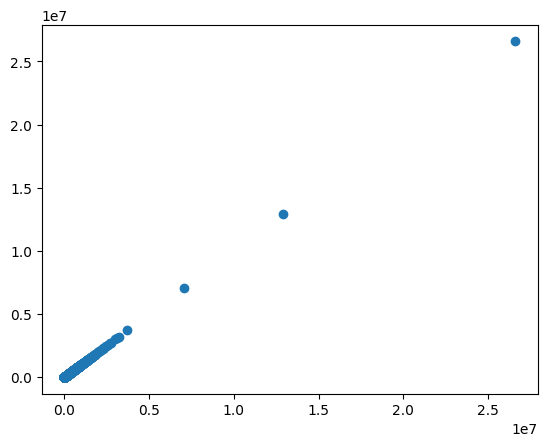

In [39]:
#Predictions
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\Win-10\AppData\Local\Temp\ipykernel_13884\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


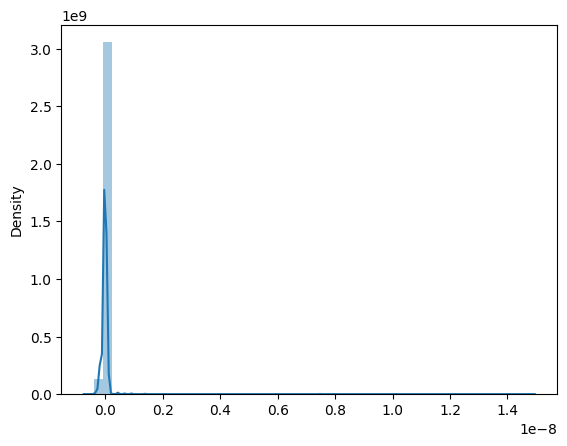

In [40]:
sns.distplot((y_test-predictions),bins=50);